# **Image Generation Bot**



**This is the Image Generation Bot!**

This chatbot generates an image from user's text description using machine learning. 
This chatbot uses Stable Diffusion, an open source SOTA model for text to image generation from Stability AI.
I created the telegram bot using the module which is called python-telegram-bot.
In this project I was focused on developing a simple bot for creating new pictures by a neural network based on a user's text description.





**First step for Google Colab**

To run Stable Diffusion we’ll need to make sure our Google Colab is using a GPU. To do this, in the menu go to ***Runtime > Change runtime type***.

A small window will appear with a dropdown under Hardware accelerator. We want to see ***GPU*** there.

# Importing necessary libraries

In [1]:
!nvidia-smi

Wed Dec 14 18:00:44 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P0    27W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install diffusers==0.10.0
!pip install transformers scipy ftfy accelerate
!pip install "ipywidgets>=7,<8"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 502 kB 2.4 MB/s 
     |████████████████████████████████| 182 kB 18.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 15.8 MB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
     |████████████████████████████████| 191 kB 73.8 MB/s 
     |████████████████████████████████| 7.6 MB 62.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 12.4 MB/s 


In [3]:
import torch
from diffusers import StableDiffusionPipeline 
from PIL import Image

In [4]:
from torch import autocast

# Working with Stable Diffusion

In [5]:
# make sure you're logged in with `huggingface-cli login`
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", revision="fp16", torch_dtype=torch.float16) 

Downloading:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.63k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/608M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/209 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/307 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/572 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/246M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/788 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/167M [00:00<?, ?B/s]

In [6]:
pipe = pipe.to("cuda")

**Function for image generation**

In [7]:
def generate(textForImage): 
    with autocast("cuda"): 
        image = pipe(textForImage).images[0]
    
    image.save('generatedimage.jpg')
    return image

Test image generation

  0%|          | 0/50 [00:00<?, ?it/s]

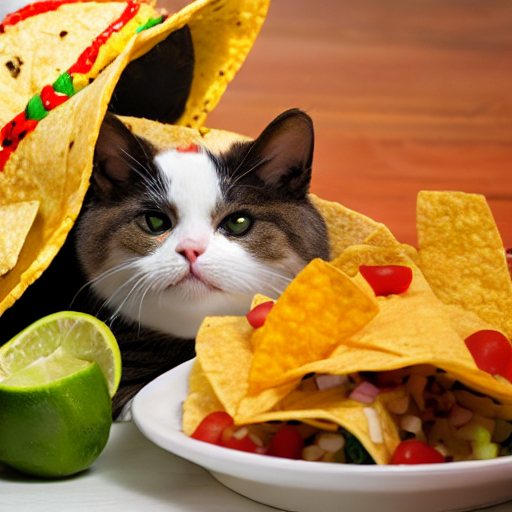

In [8]:
textForImage = 'cat with sombrero and burrito and nachos'
testExample = generate(textForImage)
testExample

**Functions for images generating**

In [9]:
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [10]:
def imges_generate(col, rows, text):
    num_cols = col
    num_rows = rows

    prompt = [text] * num_cols

    all_images = []
    for i in range(num_rows):
      images = pipe(prompt).images
      all_images.extend(images)

    grid = image_grid(all_images, rows=num_rows, cols=num_cols)
    grid
    grid.save('generatedimages.jpg')
    return grid

Test images generation

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

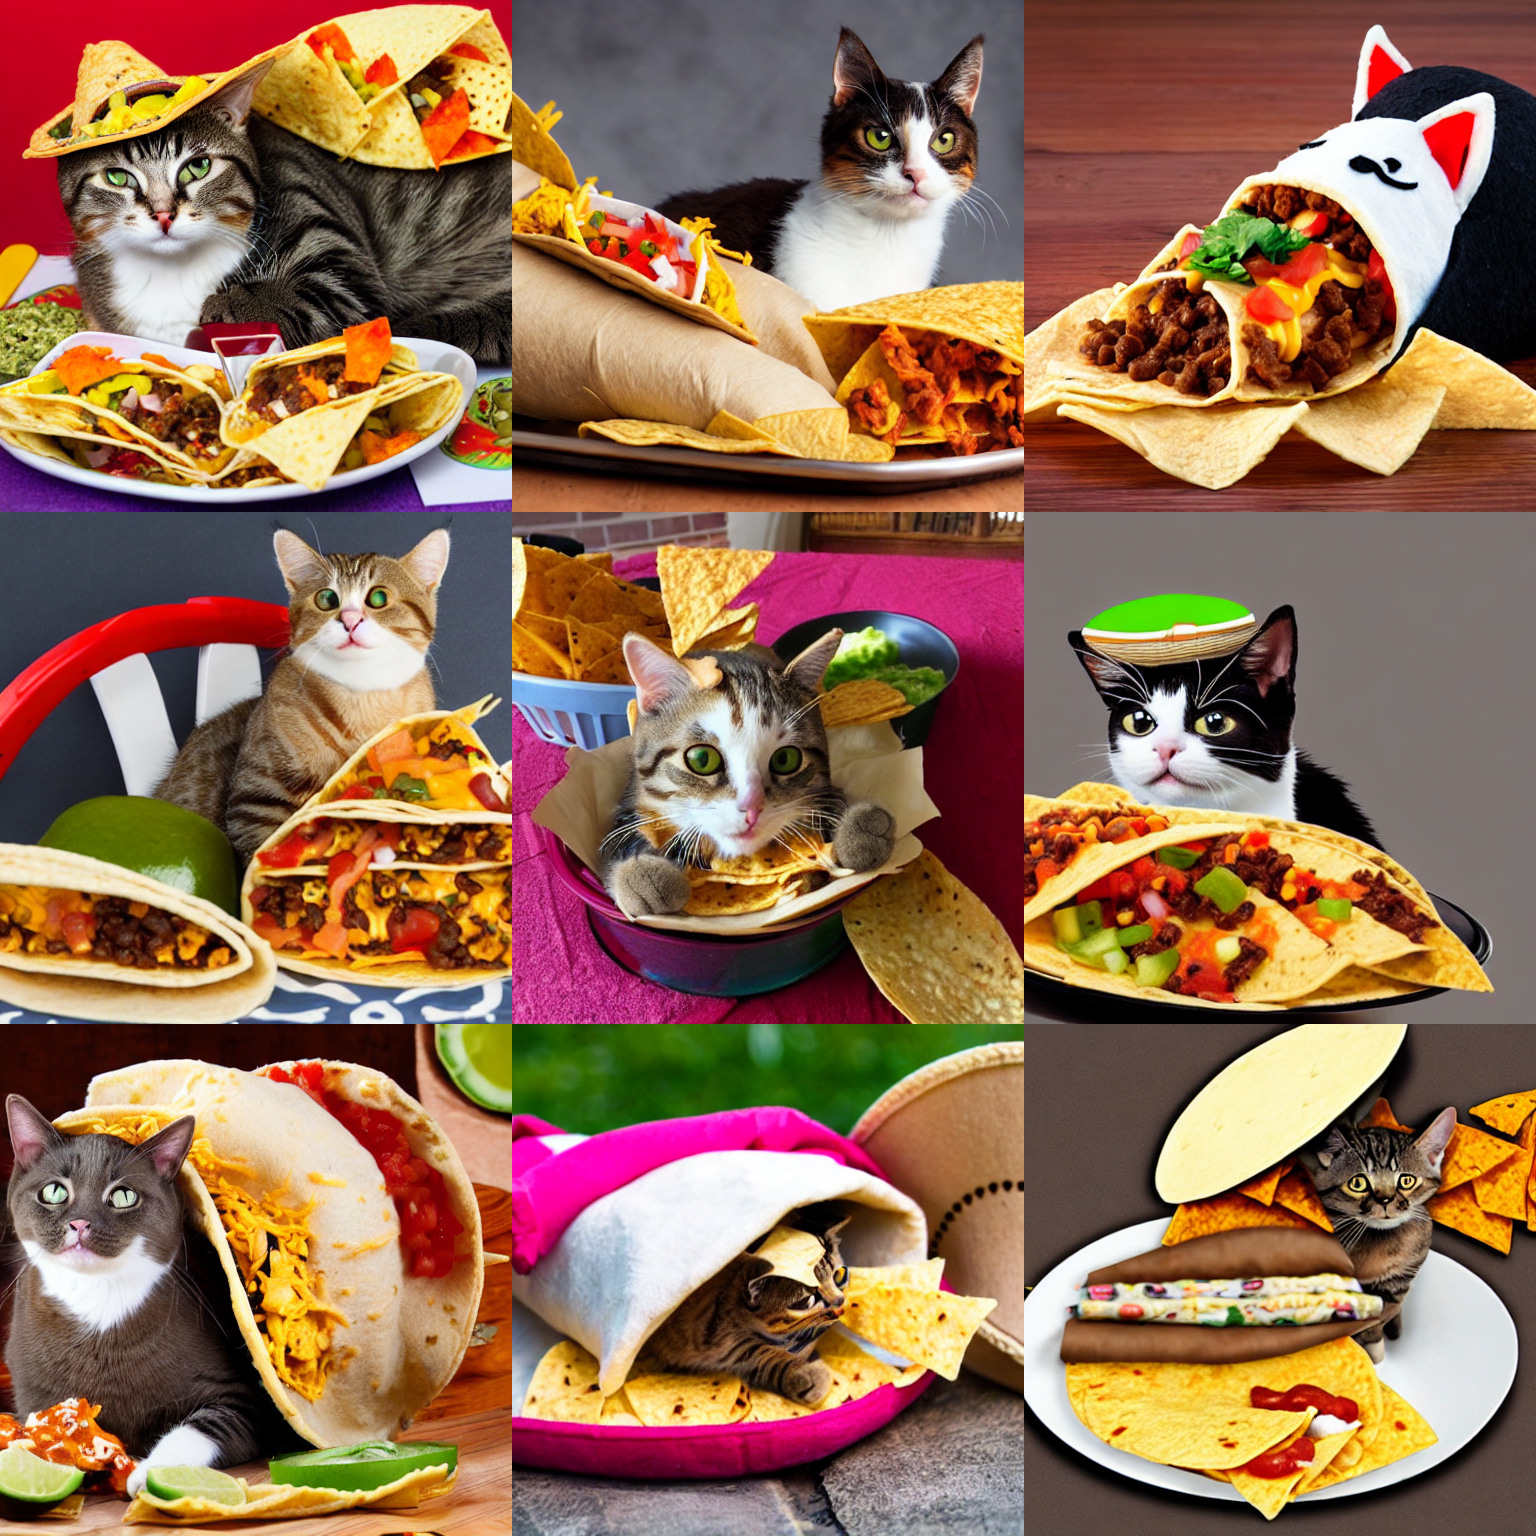

In [11]:
textForImages = 'cat with sombrero and burrito and nachos'
imges_generation = imges_generate(3, 3, textForImages)
imges_generation

# The main code of telegram bot

**Importing and installing necessary libraries**

In [12]:
!pip install python-telegram-bot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 519 kB 13.4 MB/s 
     |████████████████████████████████| 58 kB 8.3 MB/s 
     |████████████████████████████████| 427 kB 71.3 MB/s 
  Attempting uninstall: tornado
    Found existing installation: tornado 6.0.4
    Uninstalling tornado-6.0.4:
      Successfully uninstalled tornado-6.0.4
  Attempting uninstall: cachetools
    Found existing installation: cachetools 5.2.0
    Uninstalling cachetools-5.2.0:
      Successfully uninstalled cachetools-5.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires tornado~=6.0.4, but you have tornado 6.1 which is incompatible.


In [13]:
from telegram.ext import Updater, Filters, CommandHandler, MessageHandler

In [ ]:
def start(updater, context): 
	updater.message.reply_text("👋 Welcome to the Image Generation Bot! This chatbot generates an image from user's text description using machine learning. This chatbot uses Stable Diffusion, an open source SOTA model for text to image generation from Stability AI. I created the telegram bot using the module which is called python-telegram-bot. In this project I was focused on developing a simple bot for creating new pictures by a neural network based on a user's text description.\n\nJust send the image description you want to generate.")

def help_(updater, context): 
	updater.message.reply_text("This Chat Bot is only for image generation.\nJust send the image description you want to generate 💌")

def message(updater, context):
  chat_id = updater.message.chat_id
  msg = updater.message.text
  print(msg)
  imges_generation = imges_generate(3, 3, msg)
  #im = generate(msg)
  #updater.message.sendPhoto(chat_id, photo=open('./generatedimage.jpg', 'rb'))
  updater.message.reply_photo(photo=open('./generatedimages.jpg', 'rb'))


updater = Updater("!!!token to access the telegram HTTP API!!!")
dispatcher = updater.dispatcher

dispatcher.add_handler(CommandHandler("start", start))
dispatcher.add_handler(CommandHandler("help", help_))

dispatcher.add_handler(MessageHandler(Filters.text, message))

updater.start_polling()
updater.idle()

cat with sombrero and burrito and nachos


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

cat with sombrero and burrito and nachos


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Political prank in USA and Russia


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]